In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
# import kagglehub
# clmentbisaillon_fake_and_real_news_dataset_path = kagglehub.dataset_download('clmentbisaillon/fake-and-real-news-dataset')

# print('Data source import complete.')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
true_df = pd.read_csv('sampled_true.csv')
fake_df = pd.read_csv('sampled_fake.csv')

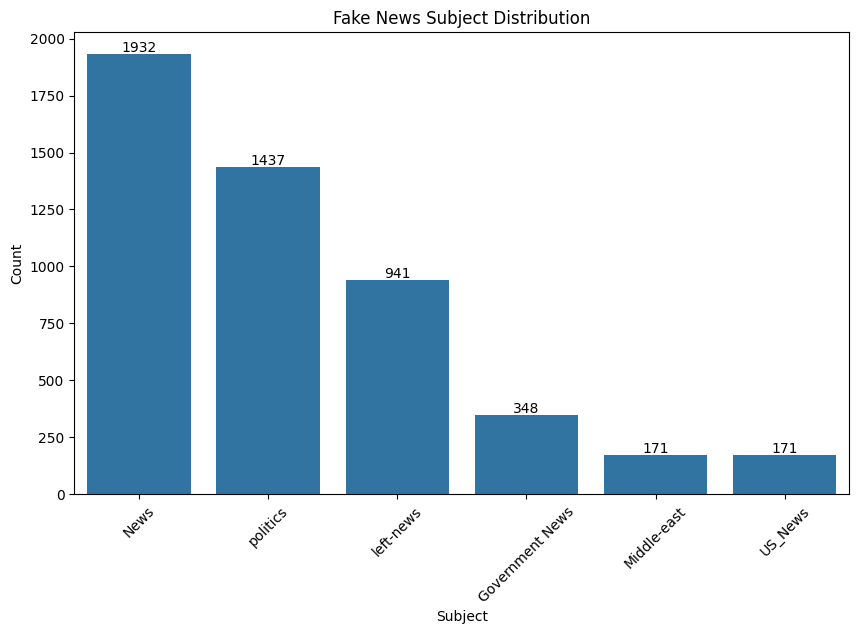

In [4]:
subject_counts = fake_df['subject'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=subject_counts.index, y=subject_counts.values)
plt.title('Fake News Subject Distribution')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
for index, value in enumerate(subject_counts):
    plt.text(index, value + 10, str(value), ha='center')

plt.show()

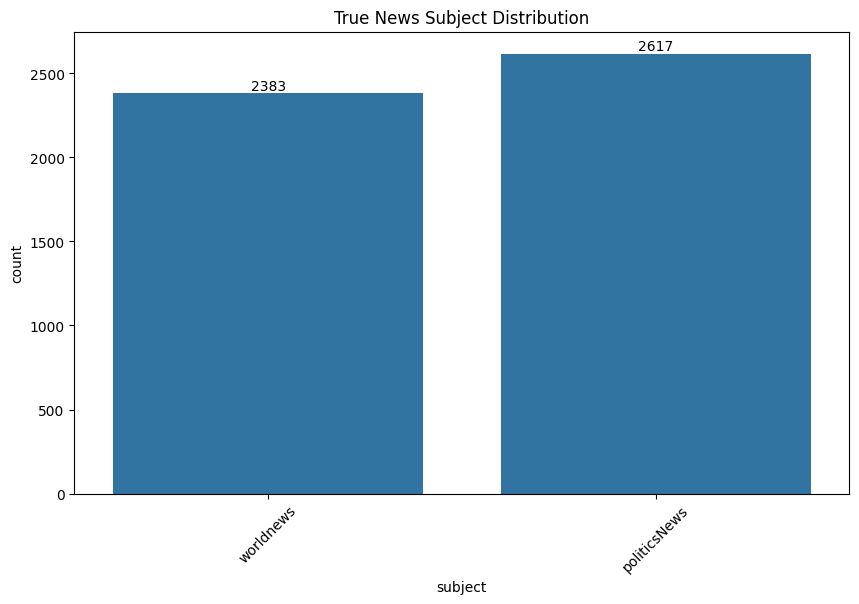

In [5]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=true_df, x='subject')
plt.title('True News Subject Distribution')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

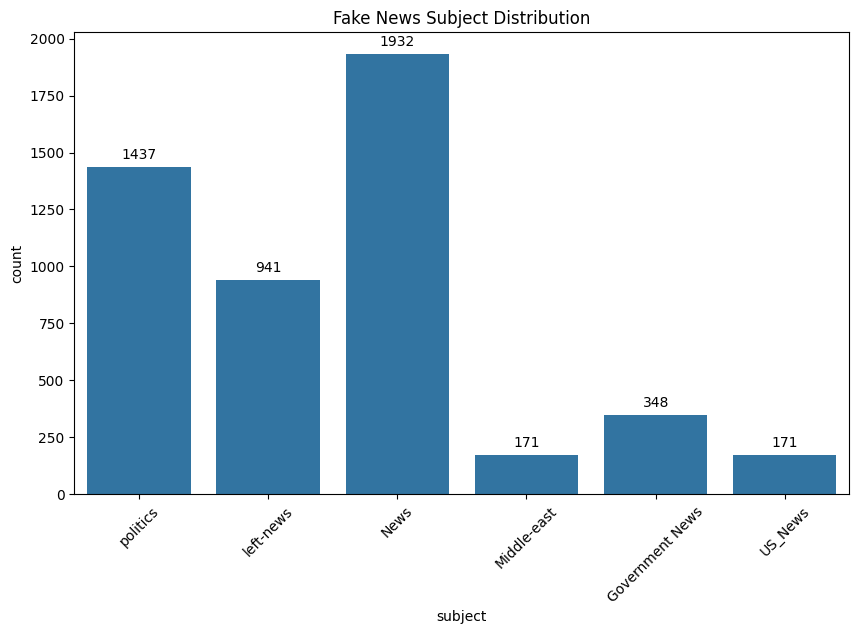

In [6]:
# Subject distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=fake_df, x='subject')
plt.title('Fake News Subject Distribution')
plt.xticks(rotation=45)

# Adding exact numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

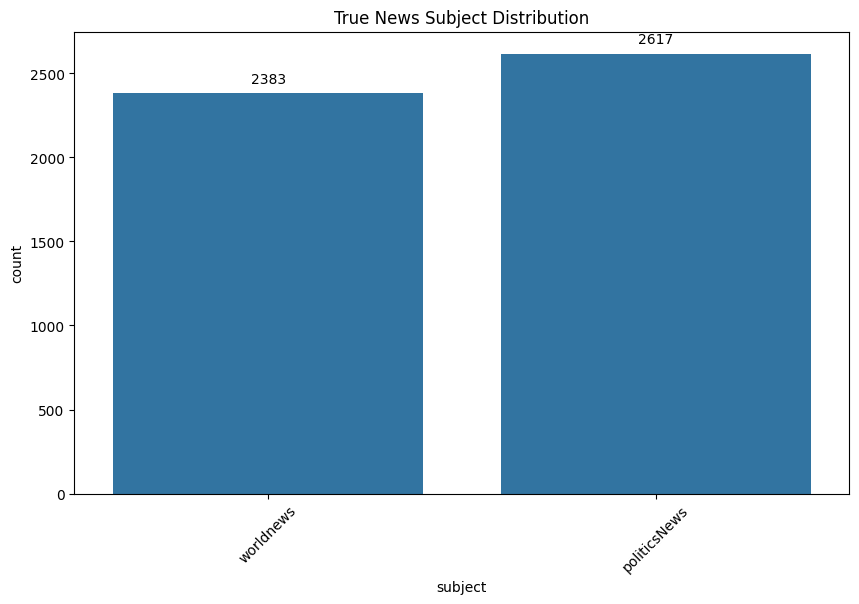

In [7]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=true_df, x='subject')
plt.title('True News Subject Distribution')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

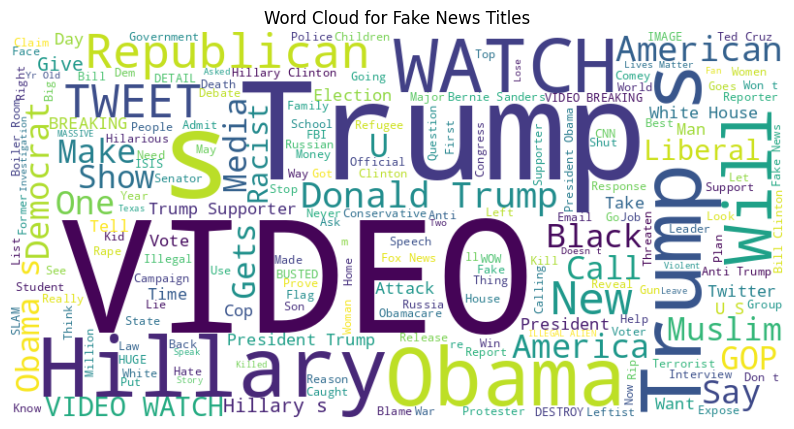

In [8]:
# Word cloud for fake news titles
fake_titles = ' '.join(fake_df['title'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News Titles')
plt.axis('off')
plt.show()

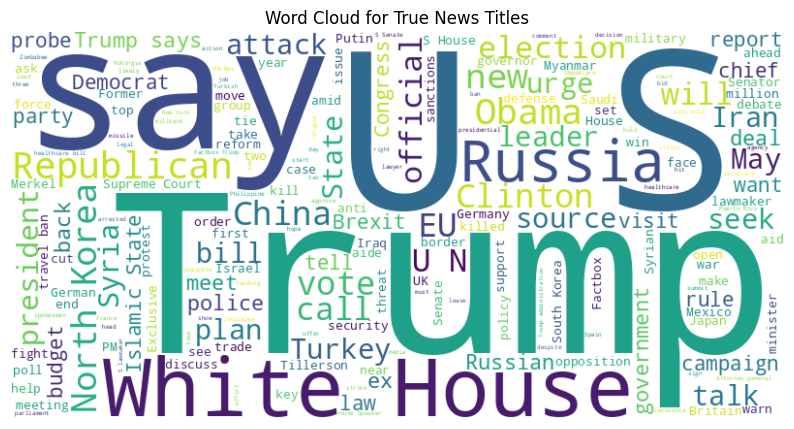

In [9]:
# Word cloud for true news titles
true_titles = ' '.join(true_df['title'])
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title('Word Cloud for True News Titles')
plt.axis('off')
plt.show()

=== 分类性能报告 ===
              precision    recall  f1-score   support

        Fake       0.96      0.88      0.92      1012
        True       0.89      0.96      0.92       988

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



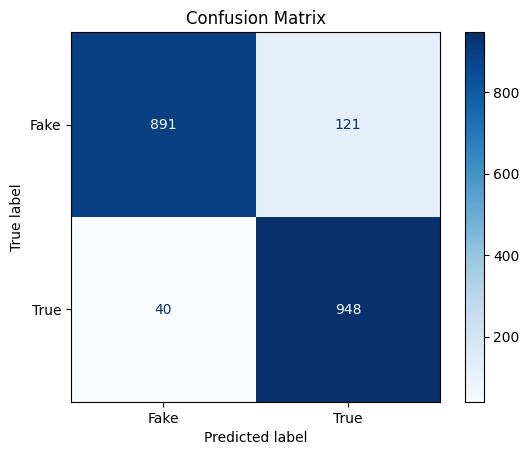

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Add a label column: 0 for fake news and 1 for real news
fake_df['label'] = 0
true_df['label'] = 1

# Merging datasets
df = pd.concat([fake_df, true_df])
df = df[['title', 'label']].dropna()

# Feature extraction
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['title'])
y = df['label']

# Split the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)
print("=== 分类性能报告 ===")
print(classification_report(y_test, y_pred, target_names=['Fake', 'True']))

# Confusion matrix visualization
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Fake', 'True'], cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
